In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
with open("C:/Users/PC/Clarin/rostros/Clarin.json", 'r') as f:
    db1= json.load(f)
    
with open("C:/Users/PC/Clarin/rostros/Lanac.json", 'r') as f:
    db2= json.load(f)

In [3]:
df1 = pd.DataFrame(db1)
df2 = pd.DataFrame(db2)

In [4]:
df1=pd.concat([df1.drop(['emotions'], axis=1), df1['emotions'].apply(pd.Series)], axis=1)
df2=pd.concat([df2.drop(['emotions'], axis=1), df2['emotions'].apply(pd.Series)], axis=1)

In [5]:
frames = [df1, df2]
df = pd.concat(frames)

In [6]:
df["n"]=1

In [7]:
df['year'] = df['archivo'].astype(str).str[0:4]
df['month'] = df['archivo'].astype(str).str[4:6]
df['day'] = df['archivo'].astype(str).str[6:8]
df['fecha'] = pd.to_datetime(df['month']+"/"+df['day']+"/"+df['year'], format='%m/%d/%Y')

In [8]:
trimestral=df.resample('Q', on='fecha').sum()

In [9]:
sent = ["angry","disgust","fear","happy","sad","surprise","neutral"]
trimestral['Sum'] = trimestral[sent].mean(axis = 1)

In [10]:
trimestral_n=pd.DataFrame()

for a in sent: 
    trimestral_n[a]=trimestral[a]/trimestral["n"]

trimestral_n["n"]=trimestral["n"]

In [11]:
sent=["angry","disgust","fear","happy","sad","surprise","neutral"]
trimestral_n.where(trimestral_n >= 0.005, 0, inplace=True)

In [12]:
trimestral_n

,angry,disgust,fear,happy,sad,surprise,neutral,n
fecha,,,,,,,,
1945-09-30,0.115926,0.000000,0.159136,0.127284,0.316543,0.034568,0.244074,81
1945-12-31,0.128879,0.000000,0.167328,0.158103,0.292759,0.023966,0.227414,232
1946-03-31,0.189086,0.000000,0.136171,0.241543,0.316229,0.019143,0.096343,175
1946-06-30,0.202458,0.000000,0.144190,0.178324,0.323575,0.009777,0.138994,179
1946-09-30,0.123622,0.000000,0.124649,0.234811,0.362216,0.019405,0.132865,185
...,...,...,...,...,...,...,...,...
2020-09-30,0.175971,0.000000,0.084628,0.304988,0.156019,0.032782,0.241127,417
2020-12-31,0.182884,0.000000,0.079488,0.307395,0.157930,0.038116,0.231767,430
2021-03-31,0.199735,0.000000,0.100177,0.269294,0.174062,0.026490,0.225143,453


In [13]:
pca = PCA(n_components=1)
trimestral_n["r"]= pca.fit_transform(trimestral_n[sent])
trimestral_n["I"]=trimestral_n["r"]*np.log(trimestral_n["n"])

bad=["angry", "disgust", "fear", "sad"]
trimestral_n["r_bad"]= pca.fit_transform(trimestral_n[bad])
trimestral_n["I_bad"]=trimestral_n["r"]*np.log(trimestral_n["n"])

good=["happy", "surprise", "neutral"]
trimestral_n["r_good"]= pca.fit_transform(trimestral_n[good])
trimestral_n["I_good"]=trimestral_n["r"]*np.log(trimestral_n["n"])

trimestral_n["P_bad"]=(trimestral_n["angry"]+trimestral_n["disgust"]+trimestral_n["fear"]+trimestral_n["sad"])/4
trimestral_n["P_good"]=(trimestral_n["happy"]+trimestral_n["surprise"]+trimestral_n["neutral"])/3

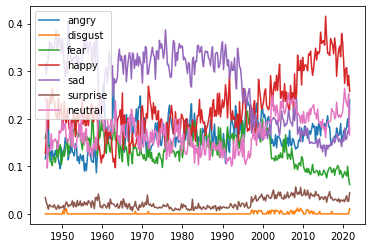

In [14]:
plt.plot(trimestral_n[sent])
plt.legend(trimestral_n.columns.tolist())

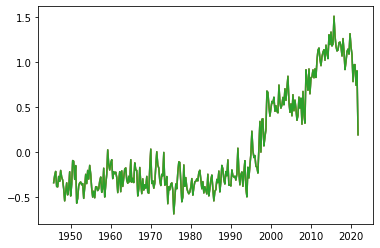

In [15]:
sent=["I", "I_bad", "I_good"]
plt.plot(trimestral_n[sent] )

In [16]:
trimestral_n["n"].sum()

78806

In [17]:
from pandas_summary import DataFrameSummary
vars=["angry","disgust","fear","happy","sad","surprise","neutral", "n"]
display(DataFrameSummary(df[vars]).summary())

,angry,disgust,fear,happy,sad,surprise,neutral,n
count,78806,78806,78806,78806,78806,78806,78806,78806
mean,0.169398,0.0031207,0.125329,0.257541,0.230994,0.0277655,0.184677,1
std,0.191883,0.0240594,0.152235,0.301943,0.207246,0.0817598,0.206858,0
min,0,0,0,0,0,0,0,1
25%,0.03,0,0.02,0.03,0.06,0,0.03,1
50%,0.1,0,0.07,0.12,0.17,0.01,0.1,1
75%,0.24,0,0.17,0.4,0.36,0.02,0.26,1
max,1,0.94,0.99,1,0.99,1,1,1
counts,78806,78806,78806,78806,78806,78806,78806,78806
uniques,101,78,100,101,99,101,101,1


# Series Macro

In [18]:
gdp_trim=pd.read_csv("C:/Users/PC/Clarin/pib_trim_a.csv", sep=";")
#gdp_trim=pd.read_csv("C:/Users/PC/Clarin/pib_2004.csv", sep=";")

In [19]:
#gdp_trim=gdp_trim[20:]

In [20]:
trimestral_n = trimestral_n.iloc[237: , :]

In [21]:
trimestral_n["id"]=np.arange(trimestral_n.shape[0])+1
gdp_trim["id"]=np.arange(gdp_trim.shape[0])+1

C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
#trimestral_n=trimestral_n[24:]

In [23]:
todo=pd.merge(trimestral_n,gdp_trim, on="id")

In [24]:
todo["gdp_t1"]=todo["g"].shift()
#todo["gdp_t4"]=todo["gdp"].shift(4)
#todo["g"]=(todo["gdp"]/todo["gdp_t4"])-1
#todo["g_1"]=todo["g"].shift()
todo=todo[1:]
todo = todo[:-1]

In [25]:
from scipy.stats import pearsonr

sent = ["angry","disgust","fear","happy","sad","surprise","neutral"]
for a in sent: 
    corr, p = pearsonr(todo[a] , todo["g"])
    print(a)
    print('Pearsons correlation: %.3f' % corr)
    print("p: %.5f" % p)
    print("\n")

angry
Pearsons correlation: -0.284
p: 0.02401


disgust
Pearsons correlation: 0.026
p: 0.83996


fear
Pearsons correlation: 0.464
p: 0.00013


happy
Pearsons correlation: -0.410
p: 0.00085


sad
Pearsons correlation: 0.454
p: 0.00018


surprise
Pearsons correlation: 0.259
p: 0.04078


neutral
Pearsons correlation: 0.089
p: 0.48945




In [26]:
from statsmodels.tsa.stattools import adfuller

sent = ["angry","disgust","fear","happy","sad","surprise","neutral","I" ,"I_good" , "I_bad", "g"]
for a in sent:
    result= adfuller(todo[a])
    print(a)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print("\n")

angry
ADF Statistic: -2.788955
p-value: 0.059869


disgust
ADF Statistic: -3.166543
p-value: 0.022005


fear
ADF Statistic: -4.249620
p-value: 0.000542


happy
ADF Statistic: -1.907119
p-value: 0.328719


sad
ADF Statistic: -1.646176
p-value: 0.459035


surprise
ADF Statistic: -1.027490
p-value: 0.743106


neutral
ADF Statistic: -1.676565
p-value: 0.443226


I
ADF Statistic: -1.664117
p-value: 0.449689


I_good
ADF Statistic: -1.664117
p-value: 0.449689


I_bad
ADF Statistic: -1.664117
p-value: 0.449689


g
ADF Statistic: -1.974715
p-value: 0.297769




In [29]:
import statsmodels.api as sm
X=["gdp_t1", "sad"]

X1 = todo[X]
y=todo["g"]
result = sm.OLS(y, X1).fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      g   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.615
Method:                 Least Squares   F-statistic:                              51.31
Date:                Thu, 02 Sep 2021   Prob (F-statistic):                    8.52e-14
Time:                        19:45:36   Log-Likelihood:                          114.01
No. Observations:                  63   AIC:                                     -224.0
Df Residuals:                      61   BIC:                                     -219.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------